In [191]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
import requests
import time
import json
import json_flatten
import fotmob_scraper as fms
from tqdm import tqdm

In [192]:
df_teams = pd.read_csv('data/super_leagues_team_stats_2122.csv')

In [193]:
df_games = pd.read_csv('data/super_leagues_game_stats_2122.csv')

In [194]:
team_colors: dict = {
    'BAS': '#FF1433', 
    'ZUR': '#00BFFF', 
    'GRA': '#0064B9', 
    'LAU': '#006EB7', 
    'LUG': '#000000', 
    'LUZ': '#154281', 
    'SER': '#870E26', 
    'SIO': '#EC1F00', 
    'GAL': '#008141',
    'YB': '#FFD940', 
    'AVG': '#FFFFFF'
}

## Average xG per Game for Super League Teams

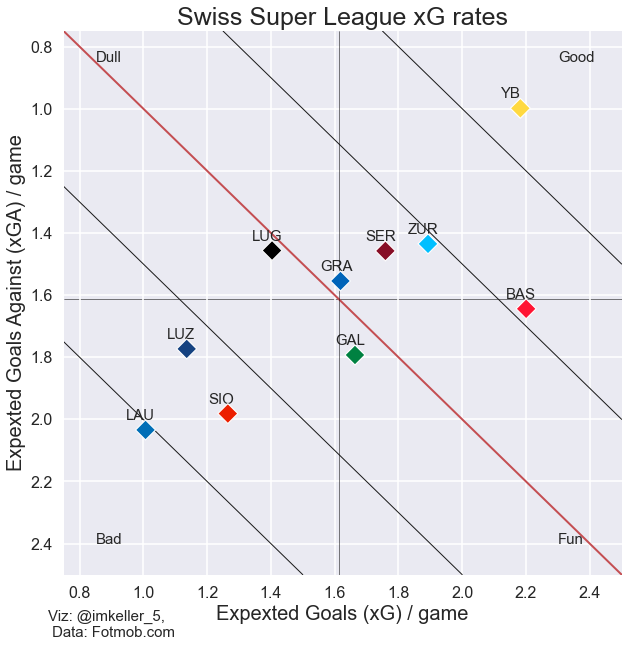

In [195]:
fig, ax = plt.subplots(figsize=(10,10))
plt.style.use(['seaborn-darkgrid','seaborn-poster'])
ax.axvline(df_teams['expected_goals_against_(xga)_mean'].mean(), color='black', linewidth=0.5, zorder=5)
ax.axhline(df_teams['expected_goals_(xg)_mean'].mean(), color='black', linewidth=0.5, zorder=0)
sns.scatterplot(x='expected_goals_(xg)_mean', y='expected_goals_against_(xga)_mean',hue='team_short',palette=team_colors,data=df_teams, s=200,legend=False,marker='D',zorder=10)
ax.set_xlabel('Expexted Goals (xG) / game',fontsize=20)
ax.set_ylabel('Expexted Goals Against (xGA) / game',fontsize=20)
ax.set_title('Swiss Super League xG rates',fontsize=25)




ax.set_xlim(0.75,2.5)
ax.set_ylim(0.75,2.5)

ax.axline(xy1=(0, 0), slope=1, color='r', lw=2)
ax.axline(xy1=(0.5, 0), slope=1, color='k', lw=1)
ax.axline(xy1=(-0.5, 0), slope=1, color='k', lw=1)
ax.axline(xy1=(1, 0), slope=1, color='k', lw=1)
ax.axline(xy1=(-1, 0), slope=1, color='k', lw=1)



ax.axes.invert_yaxis()

for a in df_teams['team_short']:
    ax.annotate(a, (df_teams.loc[df_teams['team_short'] == a,'expected_goals_(xg)_mean'].values[0],df_teams.loc[df_teams['team_short'] == a,'expected_goals_against_(xga)_mean'].values[0]), xytext=(-20,10), textcoords='offset points', fontsize=15)

ax.annotate("Viz: @imkeller_5, \n Data: Fotmob.com", (0.7, 2.7), annotation_clip=False, fontsize=15)
ax.annotate("Good", (2.3, 0.85), annotation_clip=False, fontsize=15)
ax.annotate("Dull", (0.85, 0.85), annotation_clip=False, fontsize=15)
ax.annotate("Bad", (0.85, 2.4), annotation_clip=False, fontsize=15)
ax.annotate("Fun", (2.3, 2.4), annotation_clip=False, fontsize=15)
plt.show()

fig.savefig('figs/super_league_xg_rates_25_02_22.jpg',bbox_inches='tight')

- Young Boys are able to create good chances and are good at preventing good chances
- FCB creates a lot of good chances but also lets the opponent get a good amount
- FCZ create a good amount of xG and don't lets their opponents have too much 

## Goals Over Expected for and against  

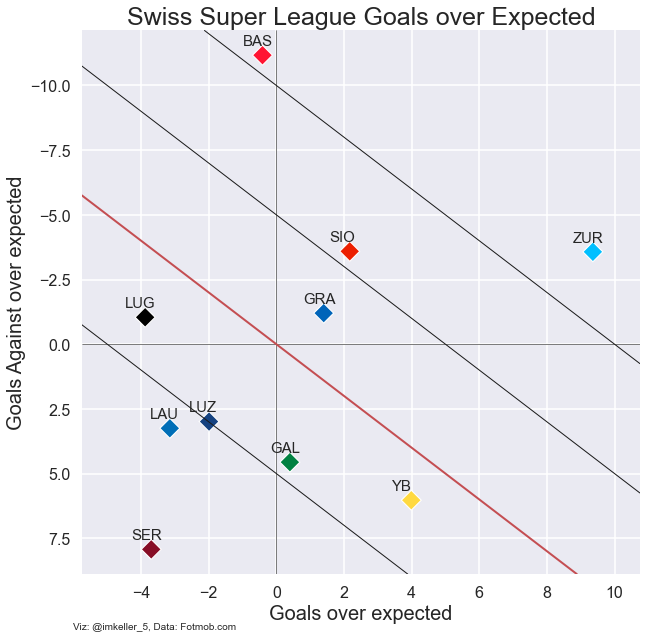

In [196]:
fig, ax = plt.subplots(figsize=(10,10))
plt.style.use(['seaborn-darkgrid','seaborn-poster'])
sns.scatterplot(x=df_teams['goals_over_expected_sum'], y=df_teams['goals_against_over_expected_sum'],hue=df_teams['team_short'],palette=team_colors, s=200,legend=False,marker='D')
ax.set_xlabel('Goals over expected',fontsize=20)
ax.set_ylabel('Goals Against over expected',fontsize=20)
ax.set_title('Swiss Super League Goals over Expected',fontsize=25)


ax.axvline(0, color='black', linewidth=0.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.axline(xy1=(0, 0), slope=1, color='r', lw=2)
ax.axline(xy1=(5, 0), slope=1, color='k', lw=1)
ax.axline(xy1=(-5, 0), slope=1, color='k', lw=1)
ax.axline(xy1=(10, 0), slope=1, color='k', lw=1)

ax.axes.invert_yaxis()

for a in df_teams['team_short']:
    ax.annotate(a, (df_teams.loc[df_teams['team_short'] == a,'goals_over_expected_sum'].values[0],df_teams.loc[df_teams['team_short'] == a,'goals_against_over_expected_sum'].values[0]), xytext=(-20,10), textcoords='offset points', fontsize=15)


ax.annotate("Viz: @imkeller_5, Data: Fotmob.com", (-6, 11), annotation_clip=False, fontsize=10)
sns.set_theme()
plt.show()

fig.savefig('figs/super_league_goals_over_expected_25_02_22.jpg',bbox_inches='tight')

- Basel scores around the expected amount and have way less goals against than expected (Goalkeeping?)
- FCZ makes more out of their chances than expected and get not as much goals against from good chances
- Bern is good at getting more goals than expected out of their chances, but also concede more goals than the quality of chances suggests 

## Expected Goals Breakdown: Where are the chances coming from? 

In [197]:
df_teams['xg_diff_mean'] = df_teams['expected_goals_(xg)_mean'] - df_teams['expected_goals_against_(xga)_mean']

In [198]:
df_teams = df_teams.sort_values('xg_diff_mean',ascending=False)

In [199]:
df_teams[['team','xg_diff_mean']]

,team,xg_diff_mean
9,Young Boys,1.183636
0,Basel,0.556364
1,FC Zürich,0.457727
6,Servette,0.301364
2,Grasshopper,0.063636
4,Lugano,-0.052727
8,St. Gallen,-0.129091
5,Luzern,-0.637273
7,Sion,-0.716364
3,Lausanne,-1.027273


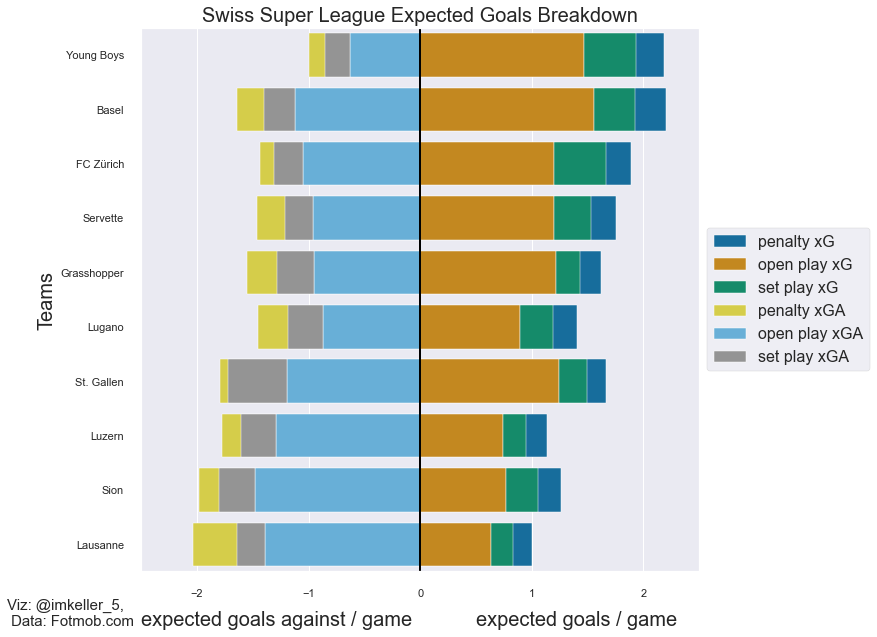

In [200]:
fig, ax = plt.subplots(figsize=(10,10))
plt.style.use(['seaborn-darkgrid','seaborn-poster'])
sns.set_palette("colorblind")

sns.barplot(y=df_teams['team'],x=df_teams['expected_goals_(xg)_mean'],label='penalty xG',color=sns.color_palette().as_hex()[0])
sns.barplot(y=df_teams['team'],x=df_teams['xg_open_play_mean'],label='open play xG',color=sns.color_palette().as_hex()[1])
sns.barplot(y=df_teams['team'],x=df_teams['xg_set_play_mean'],label='set play xG',color=sns.color_palette().as_hex()[2],left=df_teams['xg_open_play_mean'])
sns.barplot(y=df_teams['team'],x=df_teams['expected_goals_against_(xga)_mean'],label='penalty xGA',color=sns.color_palette().as_hex()[8],left=-df_teams['expected_goals_against_(xga)_mean'])
sns.barplot(y=df_teams['team'],x=df_teams['xga_open_play_mean'],label='open play xGA',color=sns.color_palette().as_hex()[9],left=-df_teams['xga_open_play_mean'])
sns.barplot(y=df_teams['team'],x=df_teams['xga_set_play_mean'],label='set play xGA',color=sns.color_palette().as_hex()[7],left=-df_teams['xga_open_play_mean']-df_teams['xga_set_play_mean'])

ax.axvline(0, color='black', linewidth=2)
ax.set_xlim(-2.5,2.5)

ax.set_ylabel('Teams',fontsize=20)
ax.set_xlabel('',fontsize=20)
ax.set_title('Swiss Super League Expected Goals Breakdown',fontsize=20)
ax.legend(loc="center left",bbox_to_anchor=(1, 0.5), frameon=True)
ax.annotate("Viz: @imkeller_5, \n Data: Fotmob.com", (-3.7, 10.5), annotation_clip=False, fontsize=15)
ax.annotate("expected goals against / game", (-2.5, 10.5), annotation_clip=False, fontsize=20)
ax.annotate("expected goals / game", (0.5, 10.5), annotation_clip=False, fontsize=20)
plt.show()

fig.savefig('figs/super_league_xg_breakdown_25_02_22.jpg',bbox_inches='tight')


- Young Boys create a lot of good amount chances from open play and don't let a lot of good chances happen
- FCZ creates a lot of good chances from set plays 
- Basel creates a lot and lets a lot of good chances happen from open play

## Rolling xG Rates over 5 games 

In [201]:
df_games['xg_diff'] = df_games['expected_goals_(xg)'] - df_games['expected_goals_against_(xga)']

In [202]:
df_games.columns

Index(['Unnamed: 0', 'ball_possession', 'expected_goals_(xg)', 'total_shots',
       'big_chances', 'big_chances_missed', 'accurate_passes',
       'fouls_committed', 'offsides', 'corners', 'shots_off_target',
       'shots_on_target', 'blocked_shots', 'shots_woodwork',
       'shots_inside_box', 'shots_outside_box', 'xg_first_half',
       'xg_second_half', 'xg_open_play', 'xg_set_play', 'xg_on_target_(xgot)',
       'passes', 'own_half', 'opposition_half', 'accurate_long_balls',
       'accurate_crosses', 'throws', 'tackles_won', 'interceptions', 'blocks',
       'clearances', 'keeper_saves', 'duels_won', 'ground_duels_won',
       'aerial_duels_won', 'dribbles_succeeded', 'yellow_cards', 'red_cards',
       'match_id', 'team', 'team_short', 'goals', 'goals_against',
       'match_round', 'pass_accuracy', 'longball_accuracy', 'cross_accuracy',
       'tackles_won_percentage', 'ground_duels_won_percentage',
       'aerial_duels_won_percentage', 'dribbles_succeeded_percentage',
       

In [203]:
df_rolling = pd.DataFrame()

In [204]:
for team in df_games['team'].unique():
    df_rolling['{}'.format(df_games.loc[df_games['team']==team,"team_short"].values[0])]= df_games.loc[df_games['team']==team].set_index('match_round').rolling(5,min_periods=1).sum()['xg_diff']

In [205]:
df_rolling

,LUZ,YB,LAU,GAL,LUG,ZUR,GRA,BAS,SIO,SER
match_round,,,,,,,,,,
1,-1.13,1.13,-1.36,1.36,0.39,-0.39,-0.38,0.38,-0.36,0.36
2,-0.74,2.74,-2.73,0.97,0.44,0.98,-1.99,5.12,-5.10,0.31
3,-2.21,3.61,-3.58,0.87,0.54,2.45,-1.14,9.19,-5.97,-3.76
4,-3.94,2.55,-5.14,2.41,0.29,3.51,-2.20,10.75,-7.51,-2.03
5,-3.81,3.48,-5.27,1.84,-0.15,4.08,-1.70,10.88,-6.82,-2.53
6,-3.79,6.79,-3.76,-1.84,-0.44,1.16,-0.21,10.79,-6.61,-0.57
7,-4.24,7.93,-4.66,-1.81,-0.77,-0.94,1.34,6.41,-1.81,0.21
8,-2.93,7.40,-4.14,-2.79,-0.66,-1.83,1.92,1.76,-2.37,4.61
9,-2.24,9.45,-4.59,-5.10,1.25,-1.56,3.75,1.24,-2.16,-0.04


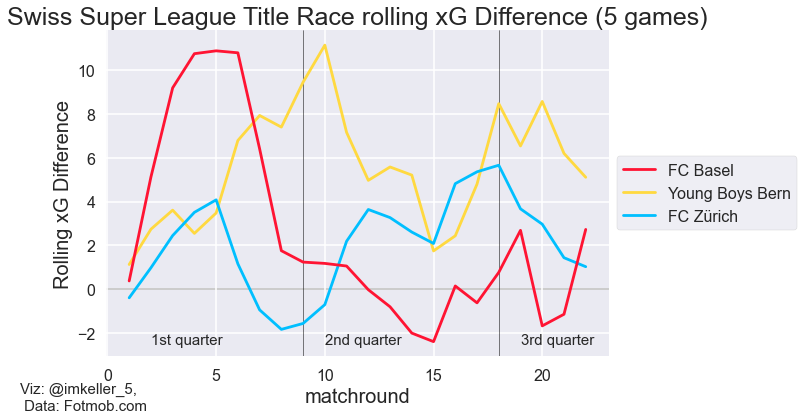

In [206]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use(['seaborn-darkgrid','seaborn-poster'])
sns.lineplot(x=df_rolling.index, y=df_rolling['BAS'], label='FC Basel', color=team_colors['BAS'],zorder=30)
sns.lineplot(x=df_rolling.index, y=df_rolling['YB'], label='Young Boys Bern',color=team_colors['YB'],zorder=20)
sns.lineplot(x=df_rolling.index, y=df_rolling['ZUR'], label='FC Zürich',color=team_colors['ZUR'],zorder=25)
ax.axhline(0, color='black', linewidth=2,zorder=0)
ax.axvline(9, color='black', linewidth=0.5,zorder=5)
ax.axvline(18, color='black', linewidth=0.5,zorder=10)
ax.set_xlabel('matchround',fontsize=20)
ax.set_ylabel('Rolling xG Difference',fontsize=20)
ax.set_title('Swiss Super League Title Race rolling xG Difference (5 games)',fontsize=25)

ax.annotate("Viz: @imkeller_5, \n Data: Fotmob.com", (-4, -5.5), annotation_clip=False, fontsize=15)
ax.annotate("1st quarter", (2, -2.5), annotation_clip=False, fontsize=15)
ax.annotate("2nd quarter", (10, -2.5), annotation_clip=False, fontsize=15)
ax.annotate("3rd quarter", (19, -2.5), annotation_clip=False, fontsize=15)


ax.legend(loc="center left",bbox_to_anchor=(1, 0.5), frameon=True)

fig.savefig('figs/super_league_rolling_xg_difference_25_02_22.jpg',bbox_inches='tight')

- FCB good first quarter, bad 2nd quarter 
- FCZ rose to the top in the 2nd quarter, regressing at the beginning of the third
- YB lows at the beginningof the first quarter and middle of 2nd quarter but continously good. 